In [1]:
pip install pandas matplotlib seaborn folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import folium

In [ ]:
                                                #Census Income#

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

First few rows of the dataset:
   Age          Workclass  Fnlwgt  

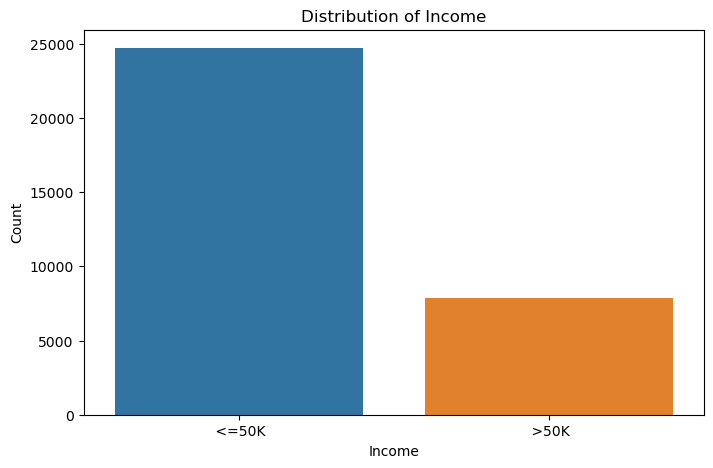

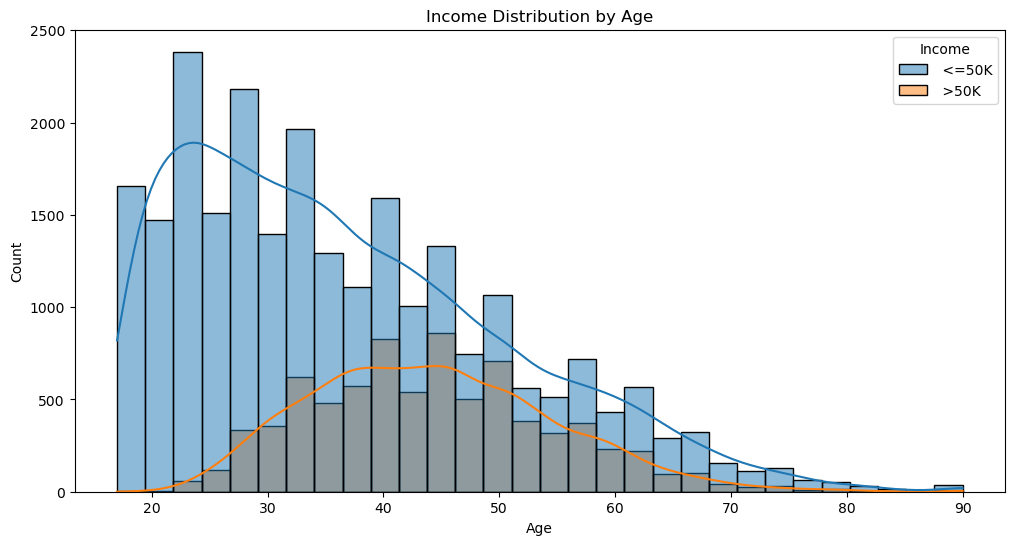

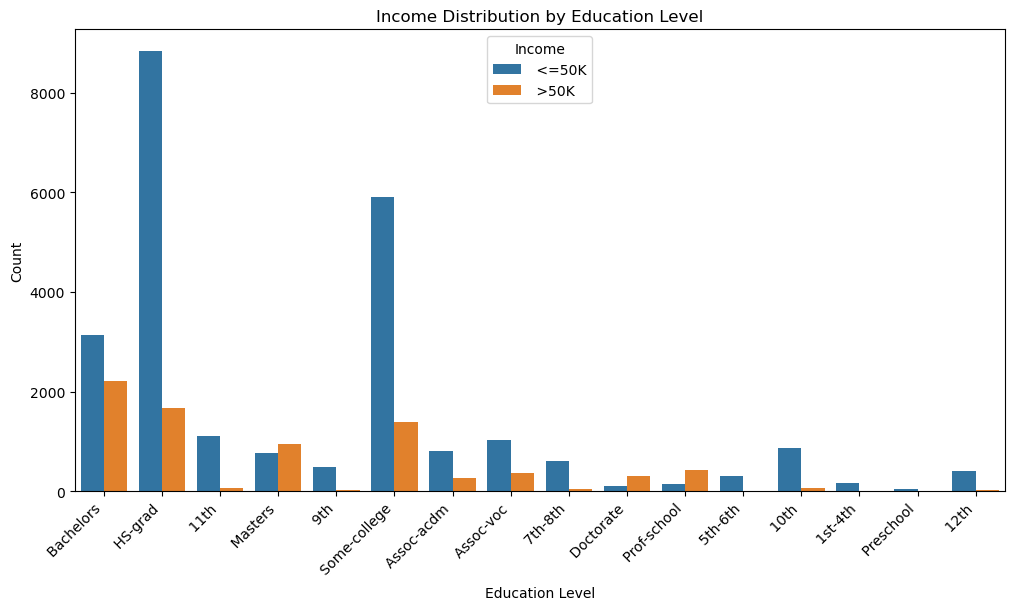

In [9]:


url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
data = pd.read_csv(url)

print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

print("\nColumn Names:")
print(data.columns)

income_column = [col for col in data.columns if 'income' in col.lower()]
if not income_column:
    raise ValueError("No column related to income found.")
else:
    income_column = income_column[0]

plt.figure(figsize=(8, 5))
sns.countplot(x=income_column, data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


age_column = [col for col in data.columns if 'age' in col.lower()]
if not age_column:
    raise ValueError("No column related to age found.")
else:
    age_column = age_column[0]


plt.figure(figsize=(12, 6))
sns.histplot(x=age_column, hue=income_column, data=data, bins=30, kde=True)
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


education_column = [col for col in data.columns if 'education' in col.lower()]
if not education_column:
    raise ValueError("No column related to education found.")
else:
    education_column = education_column[0]

plt.figure(figsize=(12, 6))
sns.countplot(x=education_column, hue=income_column, data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

native_country_column = [col for col in data.columns if 'native_country' in col.lower()]
if not native_country_column:
    raise ValueError("No column related to native country found.")
else:
    native_country_column = native_country_column[0]

country_counts = data[native_country_column].value_counts()
m = folium.Map(location=[37, -95], zoom_start=4)

for country, count in country_counts.items():
    folium.CircleMarker(
        location=[0, 0],
        radius=count / 1000,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'{country}: {count} individuals'
    ).add_to(m)

m.save('country_distribution.html')




In [ ]:
                                             #Rainfall Weather Forecasting#

Dataset Preview:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0

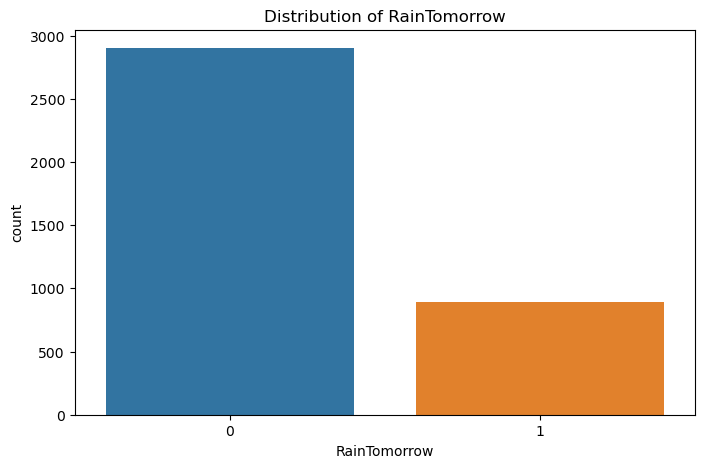

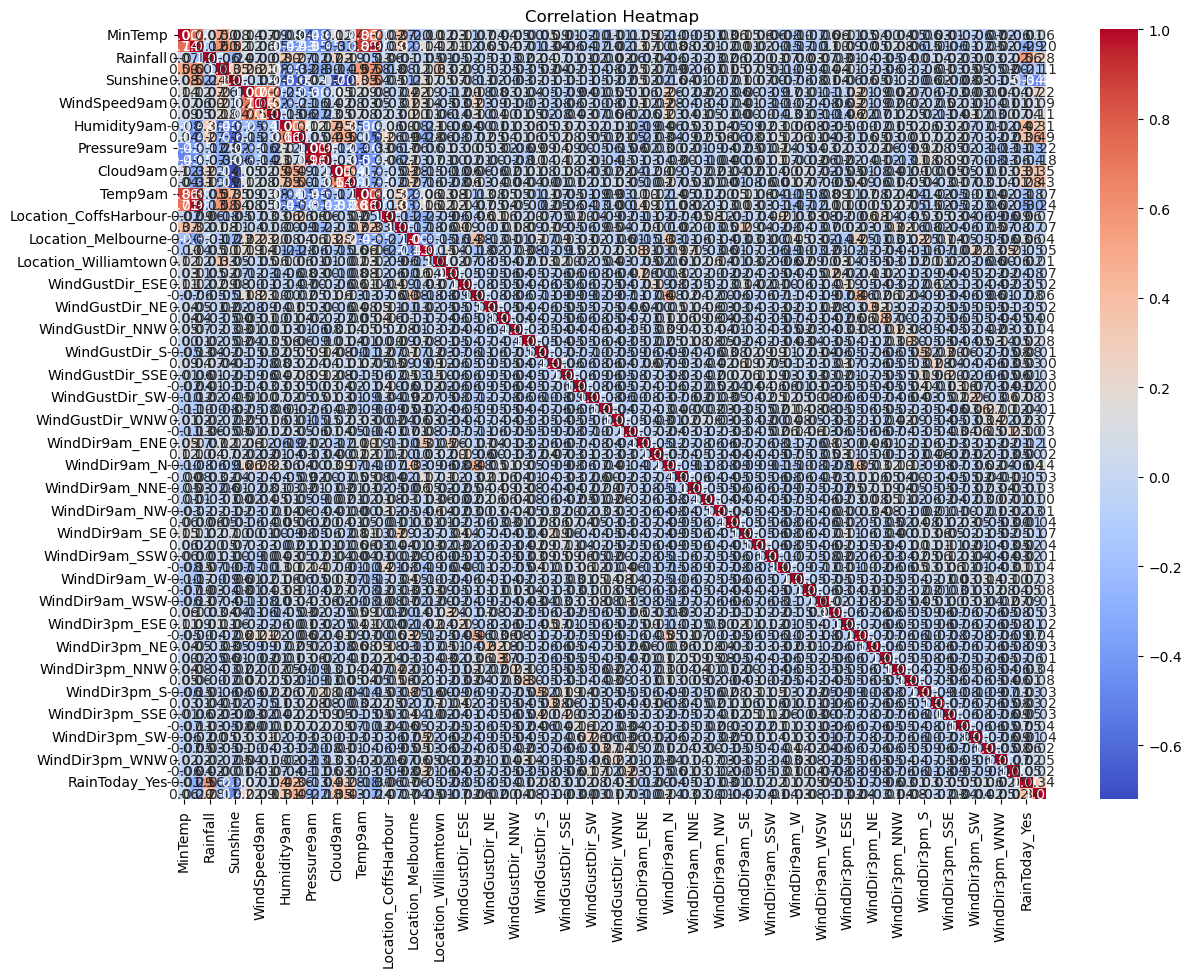

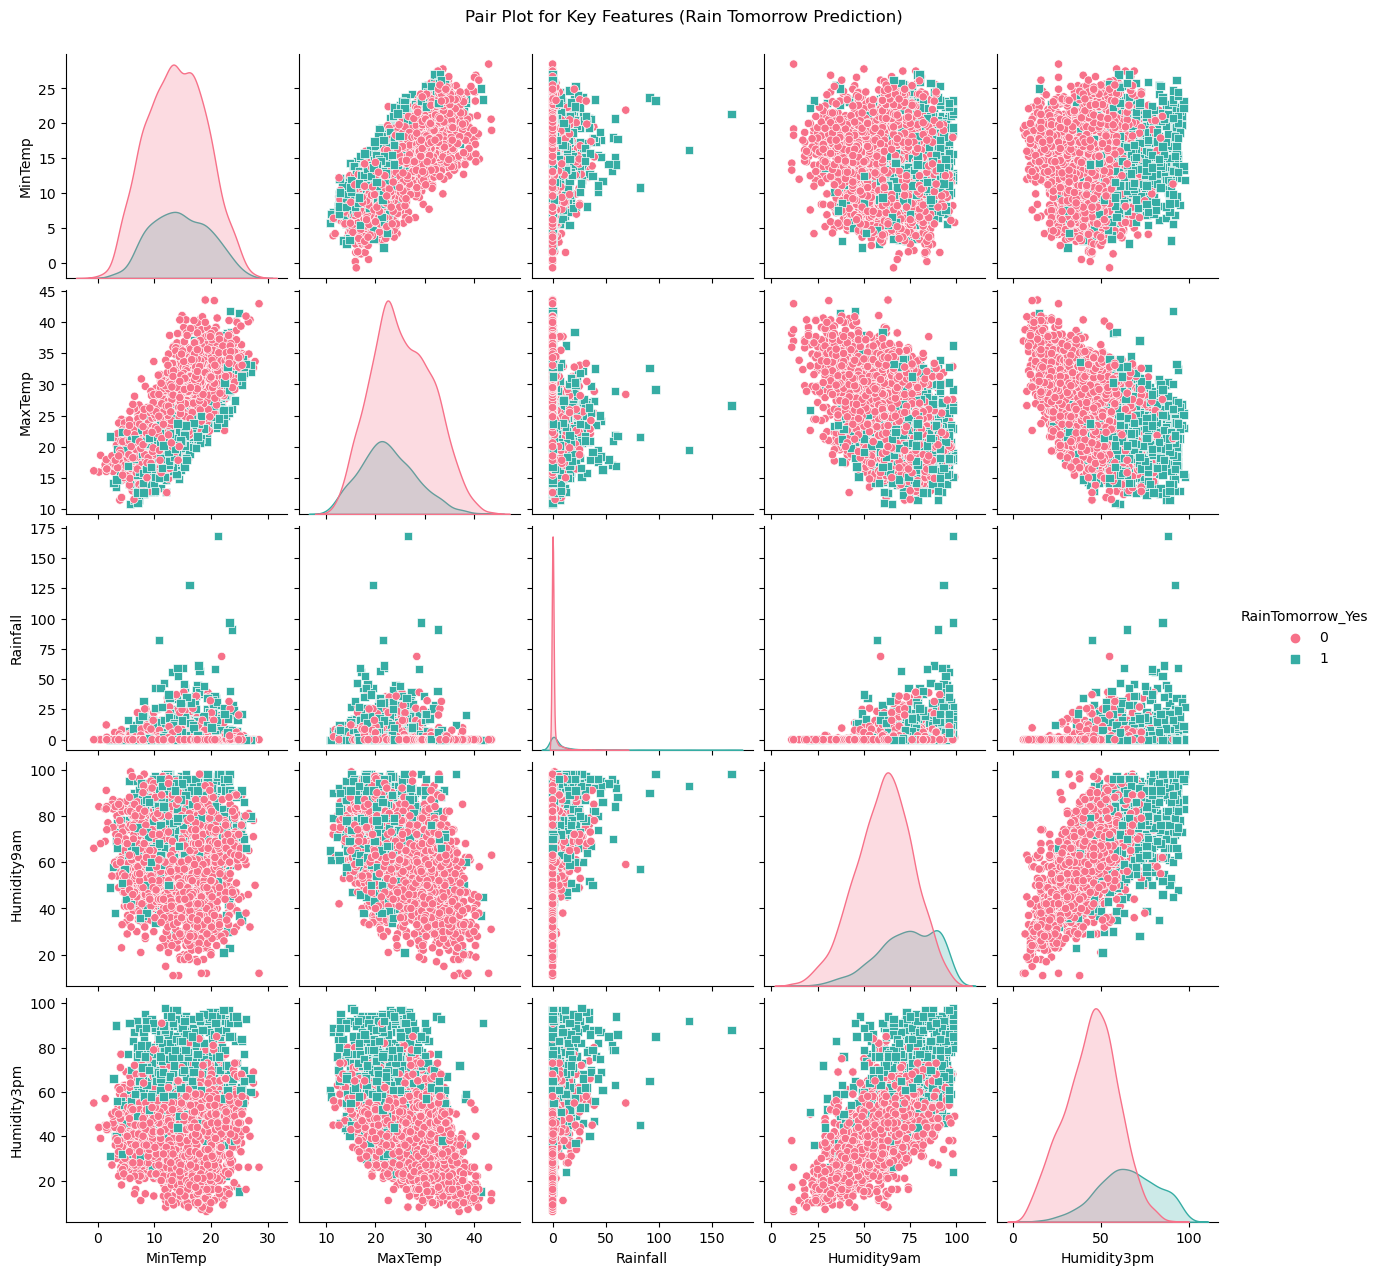

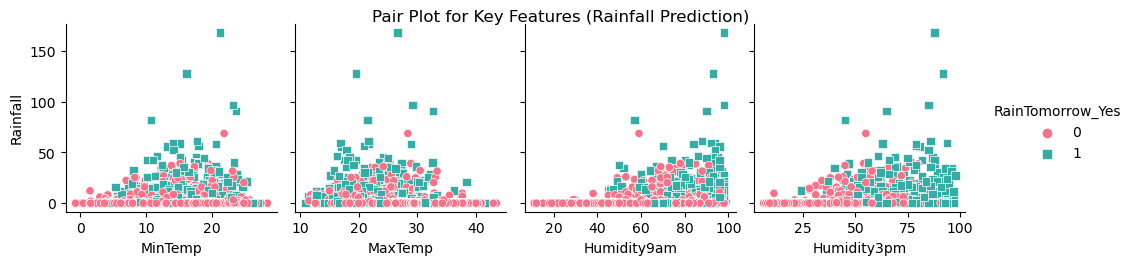

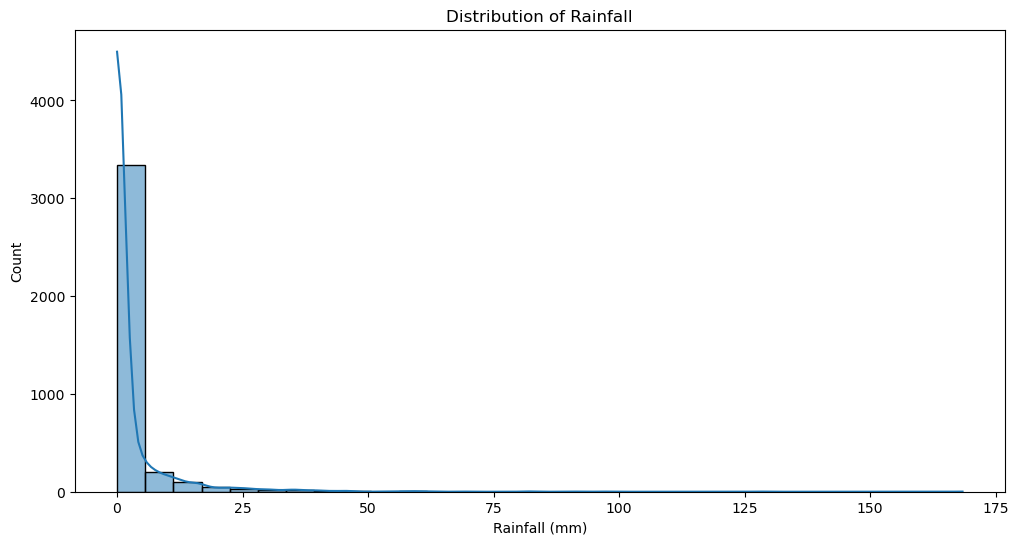

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import folium


url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv'
data = pd.read_csv(url)


print("Dataset Preview:")
print(data.head())

data.dropna(inplace=True)


data = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], drop_first=True)


print("Data Types:")
print(data.dtypes)



X_rain_tomorrow = data.drop(['RainTomorrow_Yes', 'Date'], axis=1)
y_rain_tomorrow = data['RainTomorrow_Yes']


X_rainfall = data.drop(['Rainfall', 'Date'], axis=1)
y_rainfall = data['Rainfall']


X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_rain_tomorrow, y_rain_tomorrow, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rainfall, y_rainfall, test_size=0.2, random_state=42)


clf_rt = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rt.fit(X_train_rt, y_train_rt)


reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(X_train_rf, y_train_rf)


y_pred_rt = clf_rt.predict(X_test_rt)

print("\nRain Tomorrow Prediction - Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_rt, y_pred_rt))
print("\nClassification Report:")
print(classification_report(y_test_rt, y_pred_rt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rt, y_pred_rt))


y_pred_rf = reg_rf.predict(X_test_rf)

print("\nRainfall Prediction - Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_rf, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_rf, y_pred_rf))
print("R-squared Score:", r2_score(y_test_rf, y_pred_rf))


plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow_Yes', data=data)
plt.title('Distribution of RainTomorrow')
plt.xlabel('RainTomorrow')
plt.show()

plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


pairplot_data_rt = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'RainTomorrow_Yes']]
sns.pairplot(pairplot_data_rt, hue='RainTomorrow_Yes', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot for Key Features (Rain Tomorrow Prediction)', y=1.02)
plt.show()


pairplot_data_rf = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'RainTomorrow_Yes']]
sns.pairplot(pairplot_data_rf, x_vars=['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm'], y_vars='Rainfall', kind='scatter', hue='RainTomorrow_Yes', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot for Key Features (Rainfall Prediction)', y=1.02)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='Rainfall', data=data, bins=30, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.show()


m = folium.Map(location=[-28.024, 135.887], zoom_start=4)


m.save('location_map.html')




In [ ]:
                                        #Insurance Claim Fraud Detection#

Dataset Preview:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       

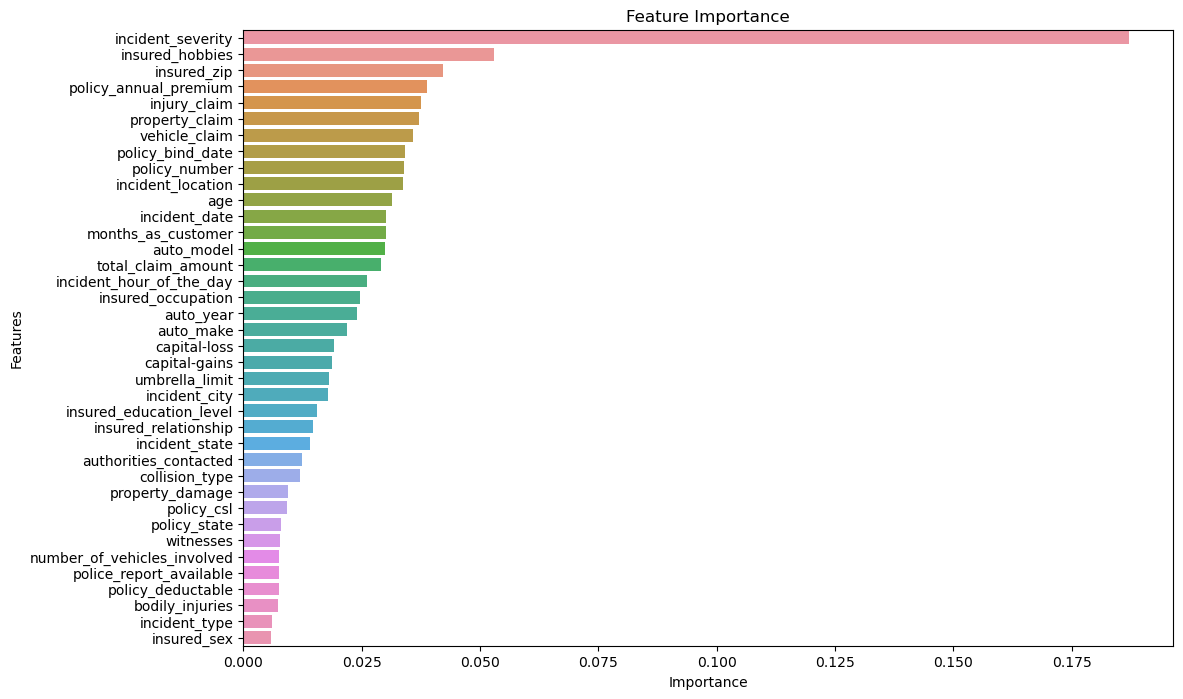

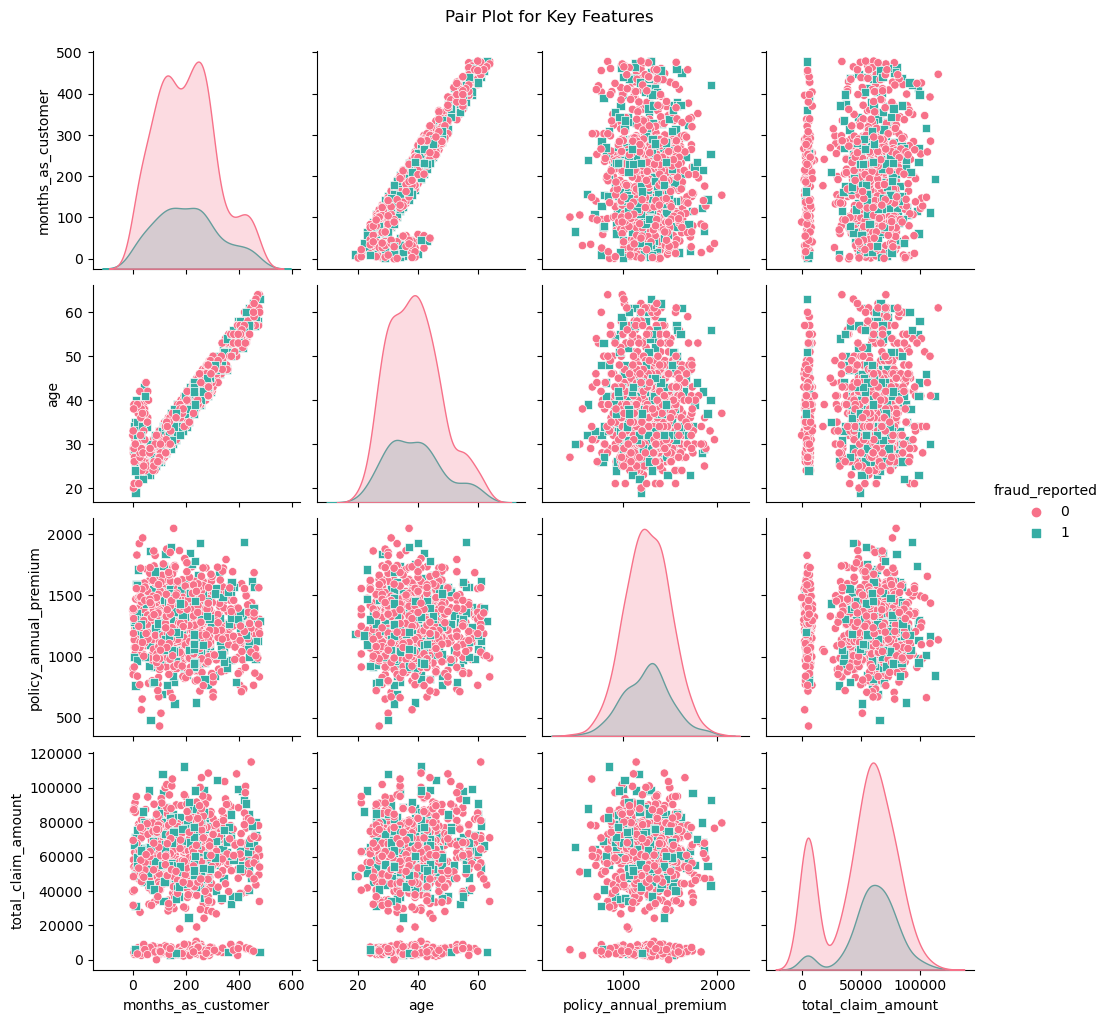

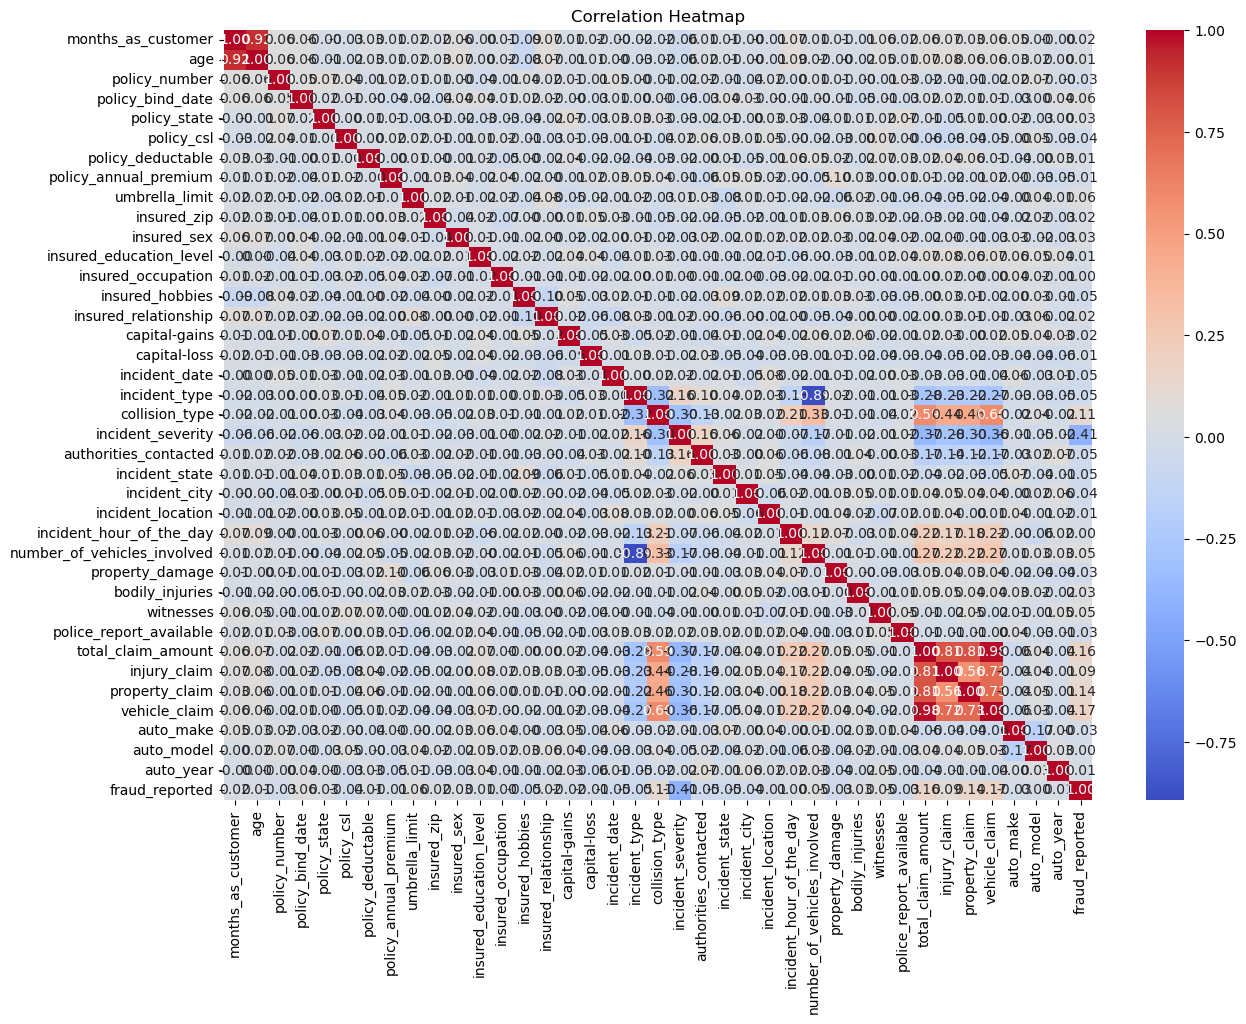

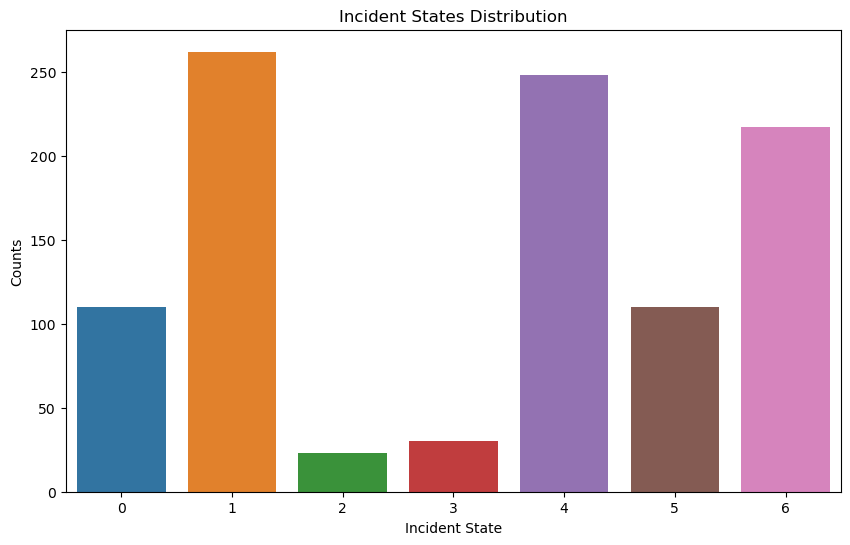

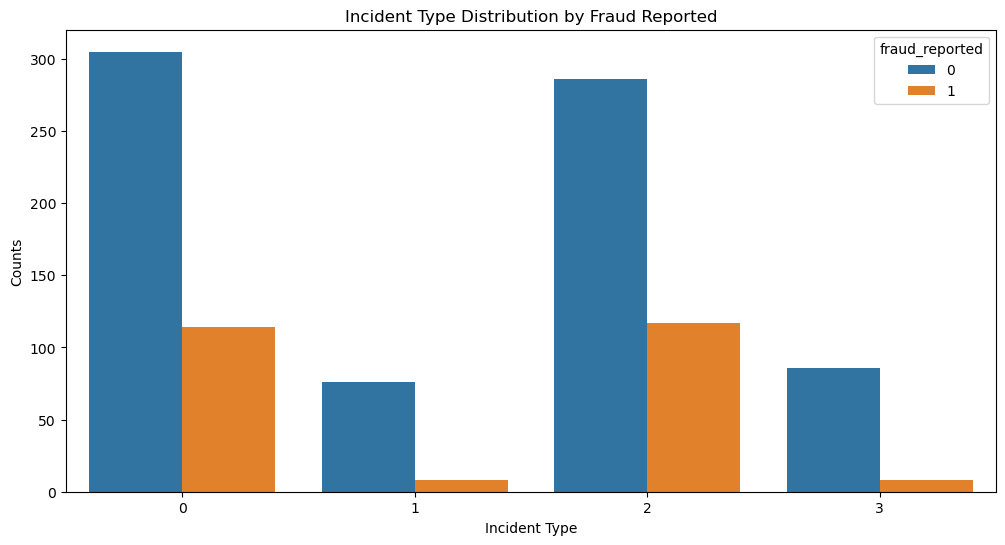

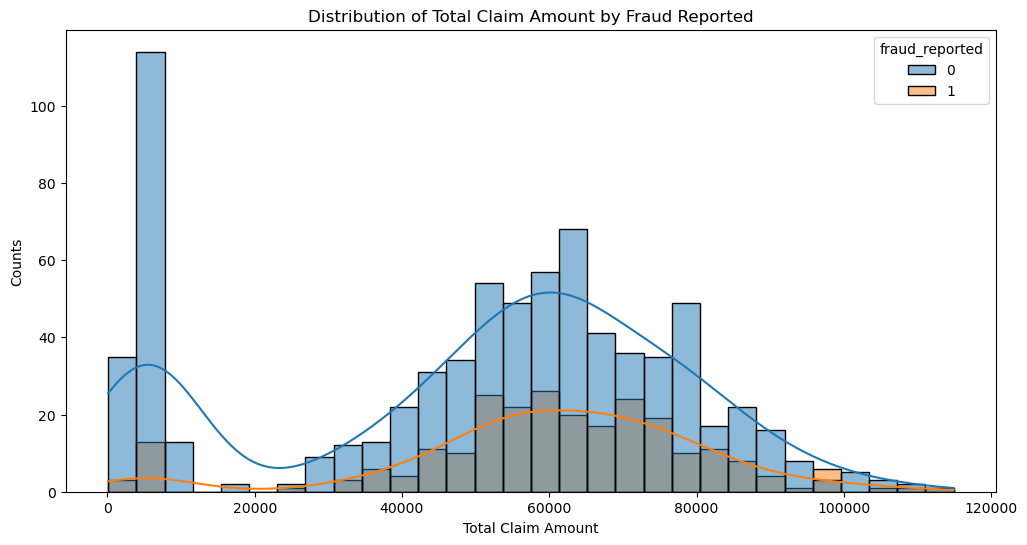

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
data = pd.read_csv(url)


print("Dataset Preview:")
print(data.head())

data = data.drop(columns=['_c39'])

data.dropna(inplace=True)

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop(['fraud_reported'], axis=1)
y = data['fraud_reported']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

pairplot_data = data[['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount', 'fraud_reported']]
sns.pairplot(pairplot_data, hue='fraud_reported', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot for Key Features', y=1.02)
plt.show()

plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

incident_states_map = data.groupby('incident_state').size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
sns.barplot(x='incident_state', y='counts', data=incident_states_map)
plt.title('Incident States Distribution')
plt.xlabel('Incident State')
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='incident_type', hue='fraud_reported', data=data)
plt.title('Incident Type Distribution by Fraud Reported')
plt.xlabel('Incident Type')
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='total_claim_amount', hue='fraud_reported', data=data, bins=30, kde=True)
plt.title('Distribution of Total Claim Amount by Fraud Reported')
plt.xlabel('Total Claim Amount')
plt.ylabel('Counts')
plt.show()




In [ ]:
                                              #Zomato Restaurant#

Dataset Preview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong C

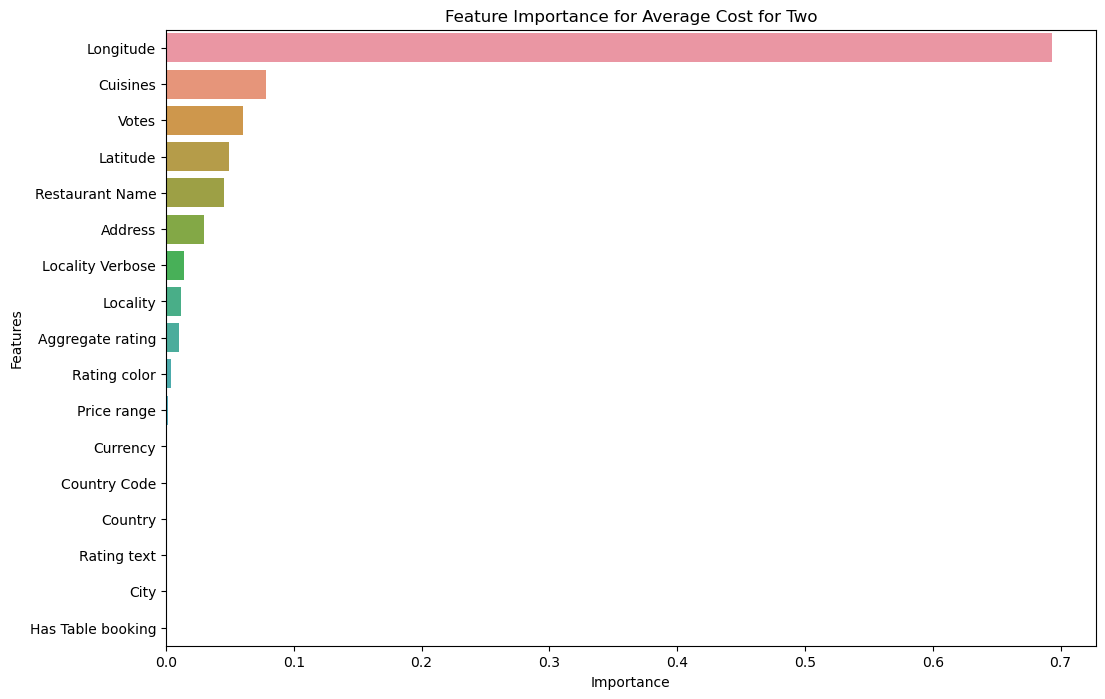

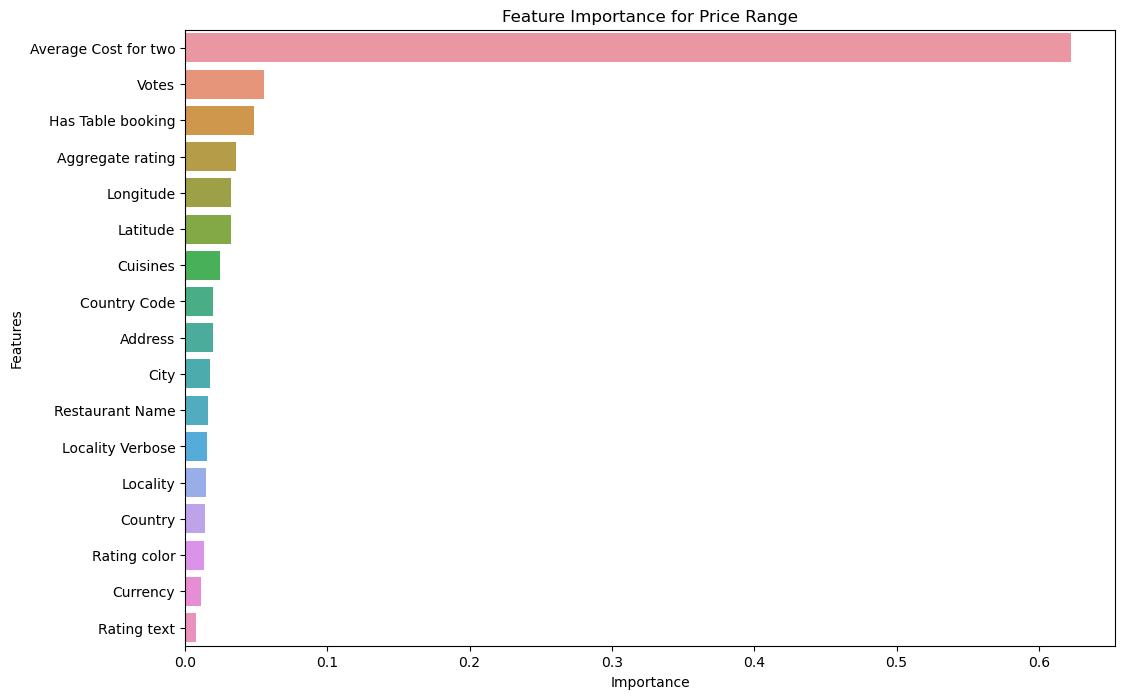

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


country_code = pd.read_excel('https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx')
zomato_data = pd.read_csv('https://github.com/dsrscientist/dataset4/raw/main/zomato.csv', encoding='latin-1')


zomato_data = pd.merge(zomato_data, country_code, on='Country Code', how='left')


print("Dataset Preview:")
print(zomato_data.head())


zomato_data = zomato_data.drop(columns=['Switch to order menu', 'Is delivering now', 'Has Online delivery', 'Restaurant ID'])


zomato_data.dropna(inplace=True)


label_encoder = LabelEncoder()
for column in zomato_data.select_dtypes(include=['object']).columns:
    zomato_data[column] = label_encoder.fit_transform(zomato_data[column])


X_avg_cost = zomato_data.drop(['Average Cost for two'], axis=1)
y_avg_cost = zomato_data['Average Cost for two']


X_price_range = zomato_data.drop(['Price range'], axis=1)
y_price_range = zomato_data['Price range']


X_train_avg_cost, X_test_avg_cost, y_train_avg_cost, y_test_avg_cost = train_test_split(X_avg_cost, y_avg_cost, test_size=0.2, random_state=42)

X_train_price_range, X_test_price_range, y_train_price_range, y_test_price_range = train_test_split(X_price_range, y_price_range, test_size=0.2, random_state=42)


regressor_avg_cost = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_avg_cost.fit(X_train_avg_cost, y_train_avg_cost)

classifier_price_range = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_price_range.fit(X_train_price_range, y_train_price_range)


y_pred_avg_cost = regressor_avg_cost.predict(X_test_avg_cost)

print("\nAverage Cost for Two Prediction - Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_avg_cost, y_pred_avg_cost))


y_pred_price_range = classifier_price_range.predict(X_test_price_range)

print("\nPrice Range Prediction - Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_price_range, y_pred_price_range))
print("\nClassification Report:")
print(classification_report(y_test_price_range, y_pred_price_range))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_price_range, y_pred_price_range))


feature_importance_avg_cost = pd.Series(regressor_avg_cost.feature_importances_, index=X_avg_cost.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_avg_cost, y=feature_importance_avg_cost.index)
plt.title("Feature Importance for Average Cost for Two")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

feature_importance_price_range = pd.Series(classifier_price_range.feature_importances_, index=X_price_range.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_price_range, y=feature_importance_price_range.index)
plt.title("Feature Importance for Price Range")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
